Сначала нужно определить какие столбцы мы хотим загрузить из нашей таблицы. 

Так, для моего примера мне нужны столбцы Volume(unit)(2), SurfaceArea (um2)(5) + количество строк.

Шаг1. Извлечение данных из xlsx в df, с которыми я смогу работать в python

glob - показывает пути к файлам с указанным расширением и сохраняет в переменную filepaths

In [243]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

Функция csv_to_xlsx считывает все файлы csv в папке, затем создает xlsx для каждого файла

In [244]:
def csv_to_xlsx():
    csv_search_string = '**/*.csv'
    csv_filepaths = glob.glob(csv_search_string, recursive=True)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=';', decimal = ',', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx()

Функция file_extraction:
1. принимает в качестве параметра строку, по которой нужно искать названия файлов 
2. создает список путей к найденным файлам
3. создает пустой датафрейм
4. в цикле считывает файлы, загружает указанные столбцы и присоединяет их к датайрему методом outer.
5. возвращает полученный датафрейм


In [245]:
def file_extraction(search_string): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[2,5]), how='outer',lsuffix=col_name_suffix,)
        col_name_suffix +=1 
    return(df)

Шаг2. Извлекаем в отдельные датафреймы все имеющиеся данные по каждому животному в контроле и при эпилепсии (N1-N6)

In [246]:
N1_gs_glt_ctrl = file_extraction('**/N1*_ctrl_*.xlsx')
N2_gs_glt_ctrl = file_extraction('**/N2*_ctrl_*.xlsx')
N3_gs_glt_ctrl = file_extraction('**/N3*_ctrl_*.xlsx')
N4_gs_glt_ctrl = file_extraction('**/N4*_ctrl_*.xlsx')
N5_gs_glt_ctrl = file_extraction('**/N5*_ctrl_*.xlsx')
#N6_gs_glt_ctrl = file_extraction('**/N6*.xlsx') 

N1_gs_glt_SE = file_extraction('**/N1*SE*.xlsx')
N2_gs_glt_SE = file_extraction('**/N2*SE*.xlsx')
N3_gs_glt_SE = file_extraction('**/N3*SE*.xlsx')
N4_gs_glt_SE = file_extraction('**/N4*SE*.xlsx')
N5_gs_glt_SE = file_extraction('**/N5*SE*.xlsx')
N6_gs_glt_SE = file_extraction('**/N6*SE*.xlsx')

Можно посмотреть описательные статистики для каждого из датафреймов. 

In [247]:
#N1_gs_glt_ctrl.describe(include='all')
#N2_gs_glt_ctrl.describe(include='all')
#N3_gs_glt_ctrl.describe(include='all')
#N4_gs_glt_ctrl.describe(include='all')
#N5_gs_glt_ctrl.describe(include='all')

#N1_gs_glt_SE.describe(include='all')
#N2_gs_glt_SE.describe(include='all')
#N3_gs_glt_SE.describe(include='all')
#N4_gs_glt_SE.describe(include='all')
#N5_gs_glt_SE.describe(include='all')
#N6_gs_glt_SE.describe(include='all')



Нужно получить значения количества кластеров для каждого животного - это количество строк в каждом столбце датафрейма, кроме Null

In [248]:
N1_num_glt_clusters, N2_num_glt_clusters, N3_num_glt_clusters, N4_num_glt_clusters, N5_num_glt_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_num_glt_clusters ['Контроль'] = N1_gs_glt_ctrl.count().iloc[::2]
N2_num_glt_clusters ['Контроль'] = N2_gs_glt_ctrl.count().iloc[::2]
N3_num_glt_clusters ['Контроль'] = N3_gs_glt_ctrl.count().iloc[::2]
N4_num_glt_clusters ['Контроль'] = N4_gs_glt_ctrl.count().iloc[::2]
N5_num_glt_clusters ['Контроль'] = N5_gs_glt_ctrl.count().iloc[::2]

N1_SE_num_glt_clusters, N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters, N6_SE_num_glt_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_num_glt_clusters['ЭС'] = N1_gs_glt_SE.count().iloc[::2]
N2_SE_num_glt_clusters['ЭС'] = N2_gs_glt_SE.count().iloc[::2]
N3_SE_num_glt_clusters['ЭС'] = N3_gs_glt_SE.count().iloc[::2]
N4_SE_num_glt_clusters['ЭС'] = N4_gs_glt_SE.count().iloc[::2]
N5_SE_num_glt_clusters['ЭС'] = N5_gs_glt_SE.count().iloc[::2]
N6_SE_num_glt_clusters['ЭС'] = N6_gs_glt_SE.count().iloc[::2]


Так как нам необходимо рассчитать относительное количество кластеров в объеме реконструированного пространства, то необходимо добавить данные об общем объеме пространства.

In [249]:
df_tot_vol = pd.read_excel('data/total_vol.xlsx')
#df_tot_vol.dtypes

Полученные значения количества кластеров определяем в отдельный датафрейм.

In [250]:
values_ctrl = [N1_num_glt_clusters,N2_num_glt_clusters, N3_num_glt_clusters,N4_num_glt_clusters, N5_num_glt_clusters] 
values_SE = [N1_SE_num_glt_clusters,N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters,N6_SE_num_glt_clusters] 
glt_num_ctrl, glt_num_SE  = pd.concat(values_ctrl), pd.concat(values_SE)

glt_num_ctrl['TotVol_GLT_ctrl'] = df_tot_vol.iloc[:,0].values
glt_num_ctrl ['clusters_per_125_ctrl'] = (glt_num_ctrl['Контроль']*125)/glt_num_ctrl['TotVol_GLT_ctrl']

glt_num_SE['TotVol_GLT_SE'] = df_tot_vol.iloc[:len(glt_num_SE),2].values
glt_num_SE ['clusters_per_125_SE'] = (glt_num_SE['ЭС']*125)/glt_num_SE['TotVol_GLT_SE']

all_glt_num,all_glt_num2  = pd.DataFrame(), pd.DataFrame()
all_glt_num ['Контроль'] = glt_num_ctrl.iloc[:,2].values
all_glt_num2 ['ЭС'] = glt_num_SE.iloc[:,2].values

all_glt_num = all_glt_num.join(all_glt_num2, how='outer')

Шаг 3. Построить графики и рассчитать необходимые параметры

<AxesSubplot:>

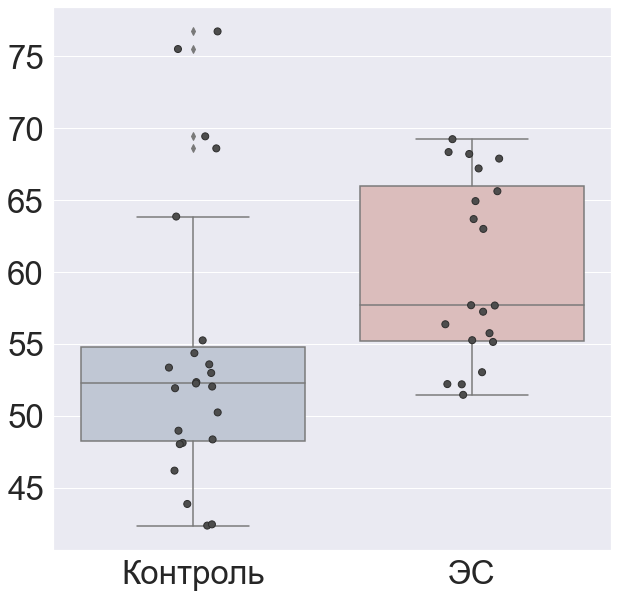

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10)) # меняет размер графика
sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set(font_scale=3)
sns.boxplot(data = all_glt_num, palette="vlag")
sns.stripplot(data=all_glt_num,
              size=7, color=".3", linewidth=1, jitter = True) #добавляет "горошки"


Посчитаем медиану, 25 и 75 процентили

In [252]:
procentile = all_glt_num.quantile([0.25, 0.50 , 0.75])
print(procentile)

       Контроль         ЭС
0.25  48.234976  55.226980
0.50  52.248112  57.680097
0.75  54.802133  66.016004


Проверим отличается ли статистически достоверно количество кластеров после ЭС в сравнении с контролем, применив непараметрический критерий Манна-Уитни

In [253]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(all_glt_num.iloc[:, 0].dropna(), all_glt_num.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=120.000, p=0.008


Рассчитаем медиану, процентили для объема кластеров GLT-1. 
Сначала загрузим в один столбец все имеющиеся значения объема кластеров для каждого животного

In [320]:
vol_glt_clust_ctrl, vol_glt_clust_SE = pd.DataFrame(), pd.DataFrame()
N1_vol_ctrl, N2_vol_ctrl, N3_vol_ctrl, N4_vol_ctrl, N5_vol_ctrl = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


#N2_vol_ctrl ['Контроль'] = N2_gs_glt_ctrl.iloc[::2]
#N3_vol_ctrl  ['Контроль'] = N3_gs_glt_ctrl.iloc[::2]
#N4_vol_ctrl  ['Контроль'] = N4_gs_glt_ctrl.iloc[::2]
#N5_vol_ctrl  ['Контроль'] = N5_gs_glt_ctrl.iloc[::2]
#print(N1_gs_glt_ctrl.iloc[:,::2])
print(N2_gs_glt_ctrl.iloc[::,2].shape)
df = pd.concat([N1_gs_glt_ctrl.iloc[:,::2],  N2_gs_glt_ctrl.iloc[:,::2]], axis = 0)
print(df)


#vol_ctrl =  df_tot_vol.iloc[:len(glt_num_SE),2].values
#ol_glt_clust_ctrl = pd.concat([N1_gs_glt_ctrl.iloc[::,2], N2_gs_glt_ctrl.iloc[::,2]], ignore_index = True, axis = 0, join = 'outer') #,N3_gs_glt_ctrl.iloc[::2], N4_gs_glt_ctrl.iloc[::2], N5_gs_glt_ctrl.iloc[::2]])

#N1_vf_ctrl  ['Контроль'] = N1_gs_glt_ctrl.sum().iloc[::2] # voluma fraction

(2801,)
      Volume (unit)2  Volume (unit)3  Volume (unit)4  Volume (unit)  \
0             0.0788          0.0931          0.0859         0.1719   
1             0.1504          0.1182          0.0465         0.2077   
2             0.3366          0.1038          0.0609         0.3222   
3             0.2685          0.0967          0.0716         0.0573   
4             0.4296          0.2685          0.4010         0.1217   
...              ...             ...             ...            ...   
2796             NaN             NaN             NaN         0.3401   
2797             NaN             NaN             NaN         0.2578   
2798             NaN             NaN             NaN         0.1396   
2799             NaN             NaN             NaN         0.1182   
2800             NaN             NaN             NaN         0.4595   

      Volume (unit)5  Volume (unit)6  Volume (unit)7  Volume (unit)8  
0                NaN             NaN             NaN             NaN